In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris_df = pd.read_csv("iris (3).csv")
X = iris_df.drop(columns="species")
y = iris_df["species"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("\n--- IRIS: Linear Kernel ---")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# RBF kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("\n--- IRIS: RBF Kernel ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))



--- IRIS: Linear Kernel ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- IRIS: RBF Kernel ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



--- LETTER RECOGNITION ---
Accuracy: 0.85825
Confusion Matrix:
 [[140   1   0   0   0   0   2   0   0   1   1   0   0   0   0   0   0   1
    1   0   1   0   0   0   1   0]
 [  2 136   0   3   0   0   0   3   0   0   0   0   0   1   0   0   0   6
    1   0   0   1   0   0   0   0]
 [  0   0 117   0   3   0   4   2   0   0   6   0   0   0   3   0   0   0
    0   0   2   0   0   0   0   0]
 [  1   4   0 144   0   0   0   2   1   1   1   0   0   1   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   2   0 128   0   4   0   0   0   1   0   0   0   0   0   1   1
    2   1   0   0   0   0   0   0]
 [  0   0   0   0   1 126   3   1   2   1   0   0   0   0   0   0   0   0
    2   4   0   0   0   0   0   0]
 [  0   0   5   4   0   0 130   1   0   1   3   0   0   0   0   0   6   2
    2   0   0   4   2   0   0   0]
 [  1   3   1  14   1   2   0  83   0   1   6   0   1   2   7   1   3  13
    0   0   2   0   0   1   2   0]
 [  0   0   0   3   0   2   0   0 127   7   0   2   0   0   0  

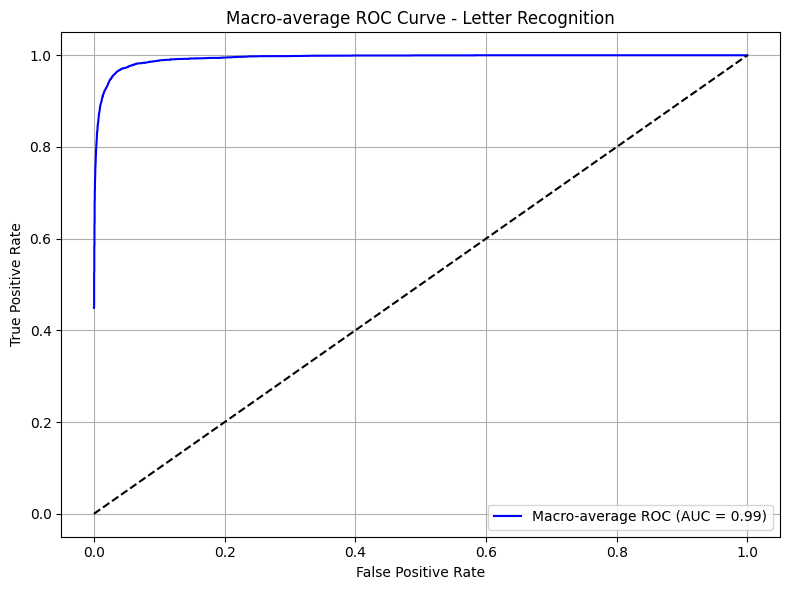

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load the Letter Recognition dataset
letter_df = pd.read_csv("letter-recognition (1).csv")
X = letter_df.drop(columns="letter")
y = letter_df["letter"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear kernel
svc = SVC(kernel="linear", probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("\n--- LETTER RECOGNITION ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
y_score = svc.predict_proba(X_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_bin.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= y_test_bin.shape[1]
macro_auc = auc(all_fpr, mean_tpr)

# Plot macro-average ROC
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='blue', label=f'Macro-average ROC (AUC = {macro_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Macro-average ROC Curve - Letter Recognition')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
